# Description

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(r'D:\Data_Projects\Melbourne-Housing-Snapshot\Melbourne-Housing-Snapshot-1\Src\lib')
from helper_functions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x )
pd.set_option('display.width', 500)

print("All of the libraries loaded")

All of the libraries loaded


## Loading Dataset

In [2]:
data_path = r'D:\Data_Projects\Melbourne-Housing-Snapshot\Melbourne-Housing-Snapshot-1\Src\data\melb_data.csv'

data = pd.read_csv(data_path)

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,4019.000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra,-37.808,144.993,Northern Metropolitan,4019.000
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra,-37.807,144.994,Northern Metropolitan,4019.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
print(f'There are {data.shape[0]} rows')
print(f'There are {data.shape[1]} Columns')

There are 13580 rows
There are 21 Columns


Now, I Split the columns to Nomerical and Categorical 

In [6]:
get_column_types(data,verbose=False)

{'numerical': ['Rooms',
  'Price',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'BuildingArea',
  'YearBuilt',
  'Lattitude',
  'Longtitude',
  'Propertycount'],
 'categorical': ['Suburb',
  'Address',
  'Type',
  'Method',
  'SellerG',
  'Date',
  'CouncilArea',
  'Regionname'],
 'other': []}

In [7]:
numerical_columns = get_column_types(data,verbose=False)['numerical']
categorical_columns = get_column_types(data,verbose=False)['categorical']

## Columns Information

- **Suburb**: This column represents the suburb where the property is located.

- **Address**: The specific street address of the property.
- **Rooms**: The number of rooms in the property.
- **Type**: This indicate the type of property (e.g., house, apartment, townhouse).
- **Price**: The sale price of the property.
- **Method**: The method of sale (e.g., auction, private treaty).
- **SellerG**: The name of the real estate agent or agency that sold the property.
- **Date**: The date the property was sold.
- **Distance**: The distance of the property from a central point of interest or city center, possibly in kilometers.
- **Postcode**: The postal code for the property's location.
- **Bedroom2**: This the number of bedrooms in the property, potentially a duplicate or a different measurement from "Rooms".
- **Bathroom**: The number of bathrooms in the property.
- **Car**: The number of car spaces available with the property.
- **Landsize**: The size of the land on which the property is built, likely measured in square meters.
- **BuildingArea**: The size of the building or living space, possibly in square meters.
- **YearBuilt**: The year in which the property was built.
- **CouncilArea**: The local government area that the property is located in.
- **Lattitude**: The geographical latitude of the property.
- **Longtitude**: The geographical longitude of the property.
- **Regionname**: A broader region or area where the property is located, potentially for regional categorization.
- **Propertycount**: This refer to the total number of properties in the suburb or region, giving an idea of the area's density or size.

## Data Cleaning

Fisrt of all, I want to change the all columns name to lower case to better access 

In [8]:
data.columns = data.columns.str.lower()

Checking Missing Values 

In [9]:
report_missing_values(data)

,column,missing_count,percentage
0,buildingarea,6450,47.496
1,yearbuilt,5375,39.580
2,councilarea,1369,10.081
3,car,62,0.457


In [10]:
null_columns = data[['car','buildingarea','yearbuilt']]

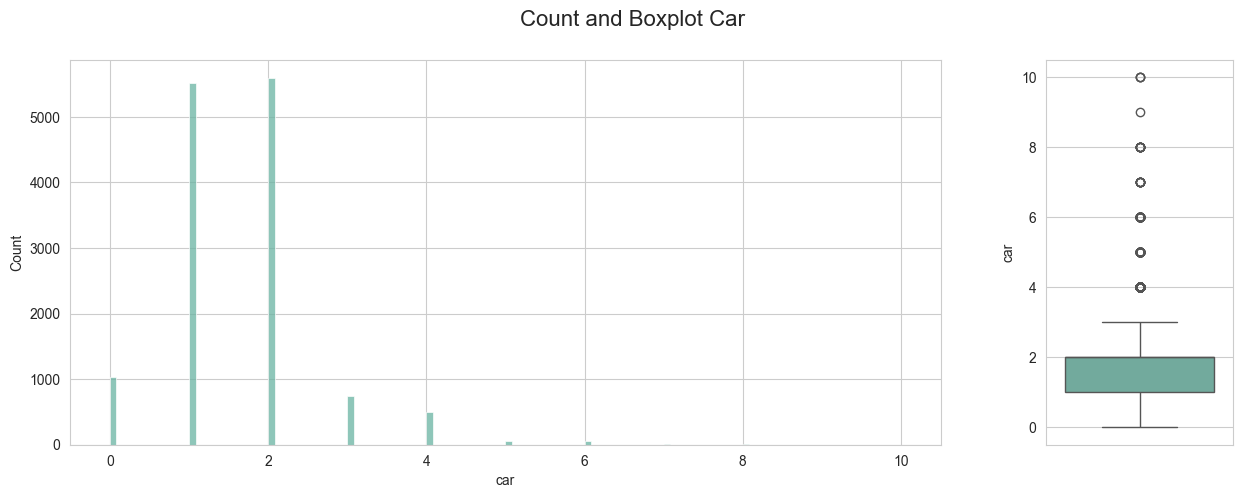

In [12]:
plot_distribution_and_box(
    data = data,
    column_name = 'car',
    title= "Count and Boxplot Car",
    figsize=(15, 5),
    width_ratios=[7, 1.5],
)

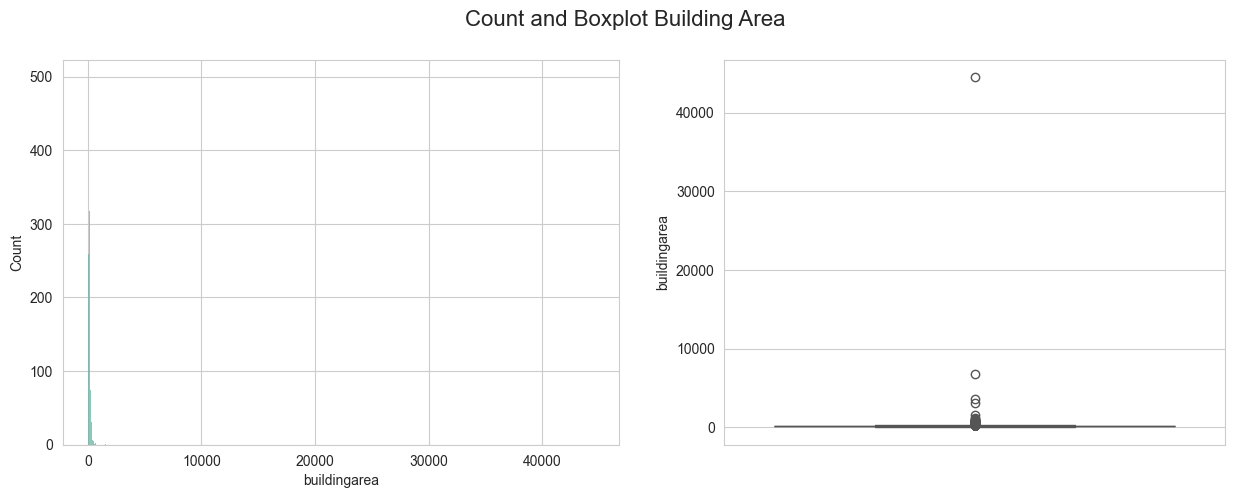

In [13]:
plot_distribution_and_box(
    data = data,
    column_name = 'buildingarea',
    title= "Count and Boxplot Building Area",
    figsize=(15, 5),
    width_ratios=[5, 4.5],
)

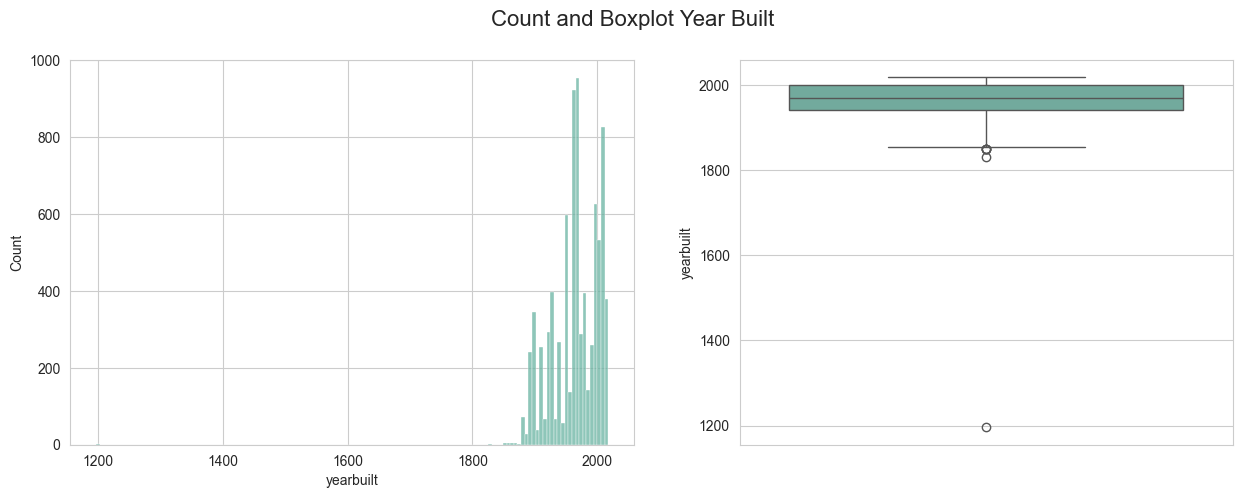

In [14]:
plot_distribution_and_box(
    data = data,
    column_name = 'yearbuilt',
    title= "Count and Boxplot Year Built",
    figsize=(15, 5),
    width_ratios=[4, 3.5],
)

Based on these visualizations, I deceided to imput null values with **KNNImputer** functions for numerical columns

In [15]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

imputed_data = knn_imputer.fit_transform(null_columns)

imputed_data = pd.DataFrame(imputed_data, columns=null_columns.columns, index=null_columns.index)

data[['car', 'buildingarea', 'yearbuilt']] = imputed_data

And useing **most_frequent** strategy for  categorical column

In [16]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='most_frequent')

data['councilarea'] = simple_imputer.fit_transform(data[['councilarea']]).ravel()

Checking Duplicated values :

In [18]:
data.duplicated().sum()

0

## General Information 

Lets Start with `price` (Target column)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


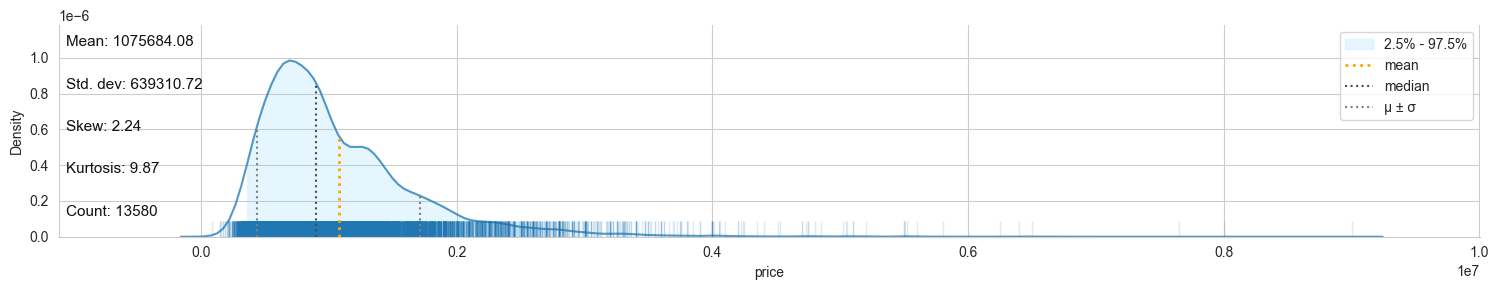

In [20]:
klib.dist_plot(data['price']);

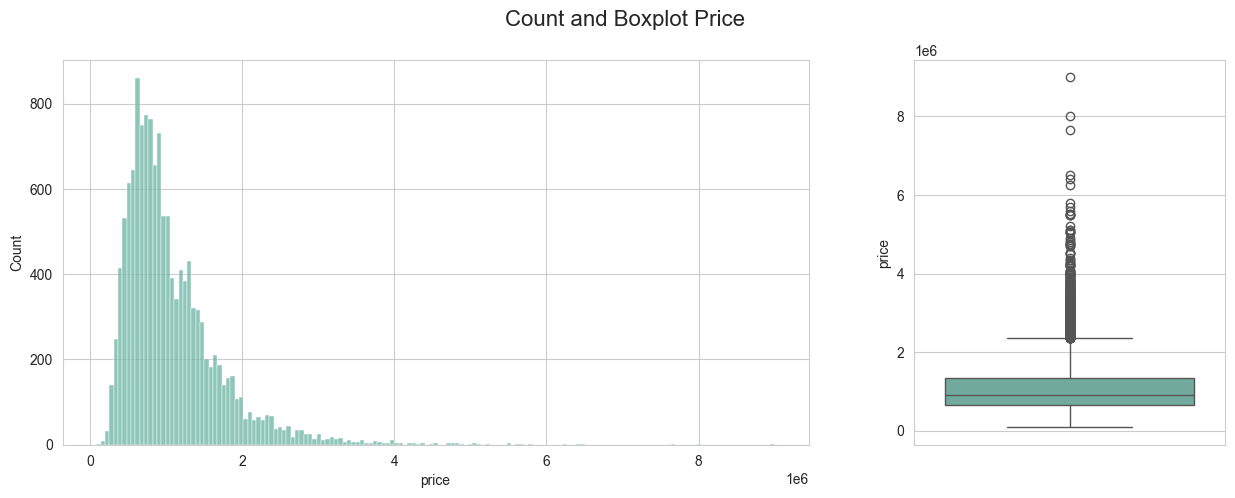

In [23]:
plot_distribution_and_box(
    data = data,
    column_name = 'price',
    title = "Count and Boxplot Price",
    figsize=(15, 5),
    width_ratios=[3, 1.25],
);

I analyzed the price column and found it to be right-skewed, suggesting there may be outliers present.

In [24]:
data.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,106.400,1957.000,Yarra,-37.800,144.998,Northern Metropolitan,4019.000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra,-37.808,144.993,Northern Metropolitan,4019.000
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,1.000,94.000,106.400,1957.000,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra,-37.807,144.994,Northern Metropolitan,4019.000


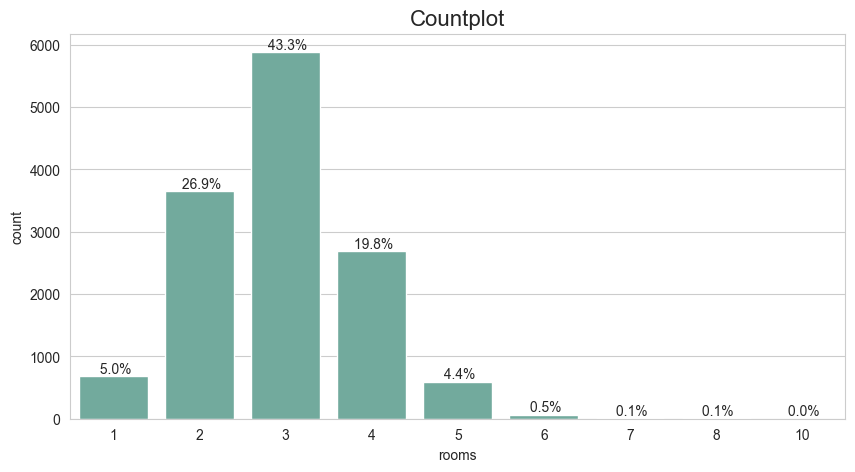

In [25]:
countplot(
    data = data,
    column_name = 'rooms',
    figsize=(15, 5),
    bar_labels = True,
    horizontal = False
);

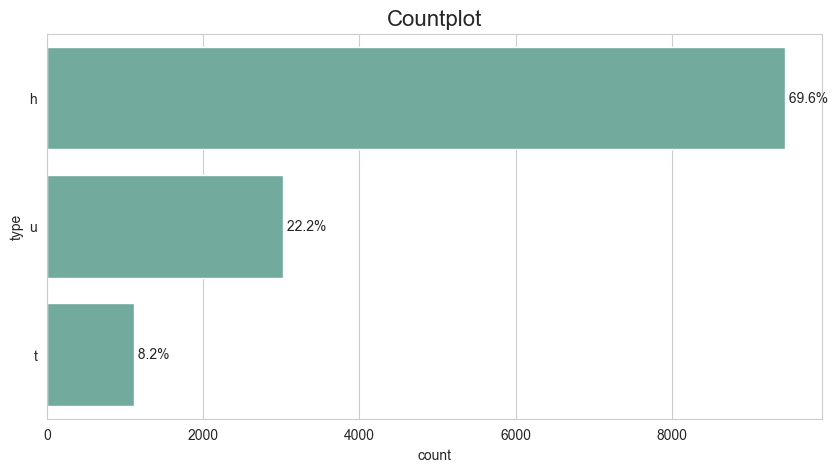

In [29]:
countplot(
    data = data,
    column_name = 'type',
    figsize=(15, 5),
    bar_labels = True,
    horizontal = True,
);

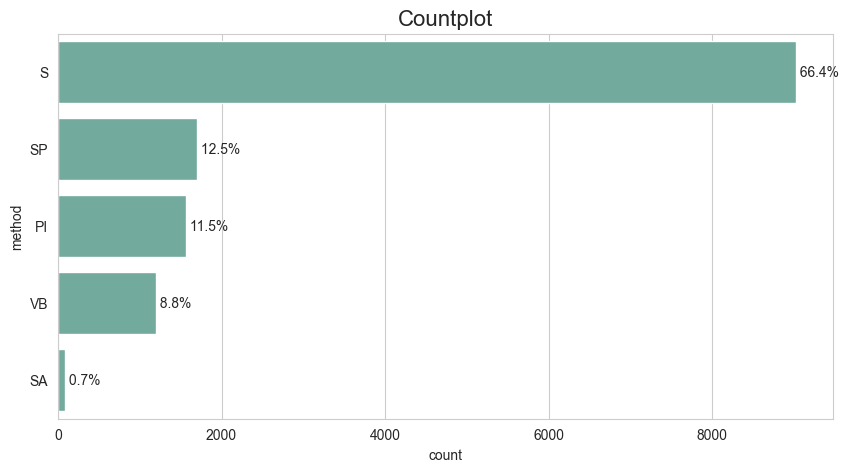

In [31]:
countplot(
    data = data,
    column_name = 'method',
    figsize=(15, 5),
    bar_labels = True,
    horizontal = True,
);

In [46]:
from datetime import datetime

current_year = datetime.now().year
data['age'] = current_year - data['yearbuilt']

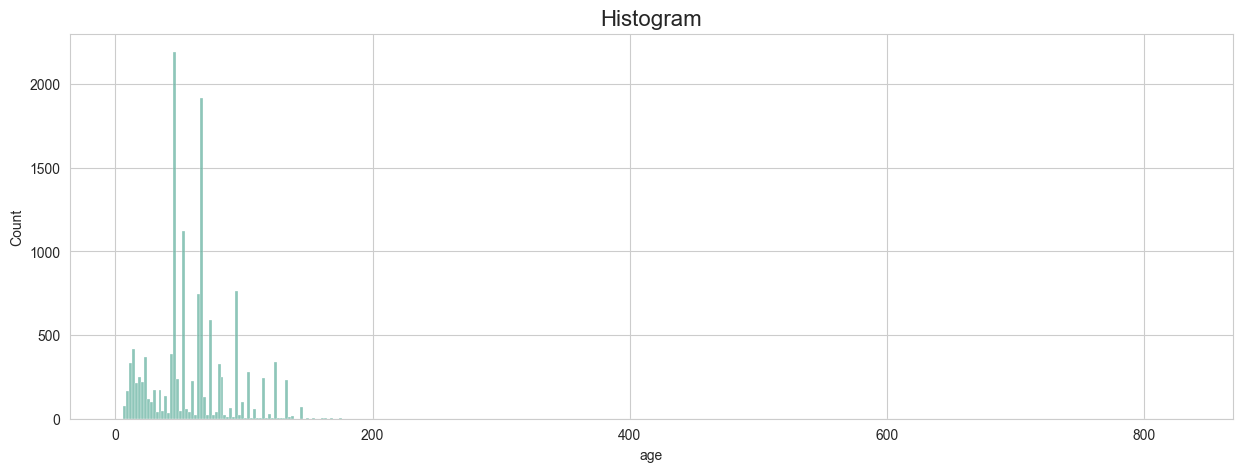

In [48]:
histplot(
    data = data,
    column_name = 'age',
    figsize=(15, 5),
);

In [ ]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV , ShuffleSplit , GridSearchCV
from sklearn.preprocessing import Normalizer , StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [ ]:
X = data.drop('Price',axis=1)
y = data['Price']

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(X, y,discrete_features):
    mi_score = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_score = pd.Series(mi_score , name = "mi_score", index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

mi_score = make_mi_score(X,y,discrete_features)
mi_score[::3]

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_score)

In [ ]:
sns.catplot(x='Rooms', y='Price',data=data,kind="boxen")